In [48]:
import tensorflow as tf
from tensorflow import keras

In [49]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

In [50]:
# 1. Fashion MNIST 데이터셋 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [51]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [52]:
train_labels[0] # label은 0~9 사이의 숫자로 정의되어 있음

9

In [53]:
train_labels.dtype

dtype('uint8')

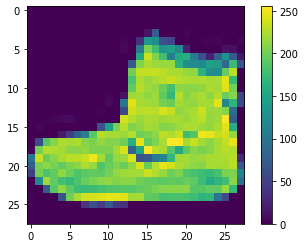

In [54]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [55]:
# 2. 데이터 전처리 - 0에서 255 사이의 값을 갖는 훈련/테스트 데이터들을 0.0~1.0 사이의 값을 갖도록 변환
train_images, test_images = train_images / 255.0, test_images / 255.0

In [56]:
# 3. One-hot encoding
train_num = np.unique(train_labels, axis=0)
train_num = train_num.shape[0]
test_num = np.unique(test_labels, axis=0)
test_num = test_num.shape[0]

train_labels.astype('int32') # dtype을 통해 data type을 확인할 수 있음
test_labels.astype('int32')

train_labels = np.eye(train_num)[train_labels]
test_labels = np.eye(test_num)[test_labels]

In [57]:
train_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [59]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size = 10)

image_batch = train_images[:3] #배치 사이즈 선정 0,1,2의 데이터만 불러오겠다
label_batch = train_labels[:3]
grad_numerical = network.numerical_gradient(image_batch, label_batch) # 수치 미분의 기울기
grad_backprop = network.gradient(image_batch, label_batch) # 오차역전파 기울기

# 각 가중치의 절대 오차의 평균을 구한다.
for key in grad_numerical.keys():
    # 가중치 매개변수의 차이의 절댓값
    diff = np.average(np.abs(grad_backprop[key] - grad_numerical[key]))
    print(key+ ":" + str(diff))

W1:8.742514710631237e-10
b1:2.4549757456261572e-09
W2:5.597581968656081e-09
b2:1.595658544864542e-07


In [60]:
# 하이퍼 파라미터
iters_num = 10000 # 반복 횟수
train_size = train_images.shape[0]
print(train_size)
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

60000


In [61]:
# 에포크 설정
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    image_batch = train_images[batch_mask]
    label_batch = train_labels[batch_mask]
    
    # 기울기를 계산
    
    grad = network.gradient(image_batch, label_batch) # 오차역전파법 방식 (훨씬 빠르다)
    
    # 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    loss = network.loss(image_batch, label_batch)
    train_loss_list.append(loss)
    
    if i% iter_per_epoch == 0:
        train_acc = network.accuracy(train_images, train_labels)
        test_acc = network.accuracy(test_images, test_labels)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("i : {:4d}\tTrain acc: {:.5f}\tTest acc: {:.5f}\tLoss: {:f}".format(i, train_acc, test_acc, loss))

i :    0	Train acc: 0.13028	Test acc: 0.12690	Loss: 2.301363
i :  600	Train acc: 0.81067	Test acc: 0.79900	Loss: 0.492536
i : 1200	Train acc: 0.83327	Test acc: 0.82370	Loss: 0.428941
i : 1800	Train acc: 0.85008	Test acc: 0.83430	Loss: 0.361228
i : 2400	Train acc: 0.85543	Test acc: 0.83630	Loss: 0.384644
i : 3000	Train acc: 0.86365	Test acc: 0.84610	Loss: 0.270148
i : 3600	Train acc: 0.87100	Test acc: 0.84790	Loss: 0.283686
i : 4200	Train acc: 0.87448	Test acc: 0.85860	Loss: 0.335708
i : 4800	Train acc: 0.88098	Test acc: 0.86210	Loss: 0.181433
i : 5400	Train acc: 0.88155	Test acc: 0.86110	Loss: 0.245409
i : 6000	Train acc: 0.87990	Test acc: 0.85650	Loss: 0.355185
i : 6600	Train acc: 0.88298	Test acc: 0.85930	Loss: 0.351612
i : 7200	Train acc: 0.88207	Test acc: 0.86270	Loss: 0.280504
i : 7800	Train acc: 0.88673	Test acc: 0.86210	Loss: 0.354827
i : 8400	Train acc: 0.89510	Test acc: 0.87020	Loss: 0.220108
i : 9000	Train acc: 0.89573	Test acc: 0.87170	Loss: 0.275324
i : 9600	Train acc: 0.89